## Predicting whether a person would pay back home loan

With the help of machine learning, it is possible to predict the chances of a person whether they would pay the loan back or not. Therefore, one would be able to understand and use different machine learning models to understand the behaviour of the user and whether there is a possibility to pay back the loan. Using different machine learning models, we are going to be predicting the chances of a person paying back the loan respectively.

The output that we are going to be predicting whether a person would pay the loan back or not is a discrete variable. We are going to be using different machine learning models and understand the behaviour of different customers. In addition to this, we are going to be importing various libraries that are important for machine learning. We see that there are different libraries that could be used for deploying machine learning and deep learning models. 

We first start the project by importing various libraries that are important for data visualization purposes respectively. There are different machine learning models that we are going to be using in order to get the predictions. We see that there are some machine learning models that are important. 

We are now going to be dividing the data into training and test set. 

In [172]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
import gc
warnings.filterwarnings('ignore')

## Creating Train and Test Path

In this cell, variables such as train_path and test_path are created which would be used later. It is important to define the paths early in order to access the contents from paths respectively. 


In [173]:
TRAIN_PATH = '../Home Loan Default Datasets/'
TEST_PATH = '../Home Loan Default Datasets/'

## Reading the Train and Test dataframe

We are going to be reading the training and the test dataframes that we are going to be working with in machine learning. We are also going to use the garbage collection library. 

In [174]:
df_train = pd.read_csv(os.path.join(TRAIN_PATH, 'application_train.csv'))
df_test = pd.read_csv(os.path.join(TEST_PATH, 'application_test.csv'))
gc.collect()



34639

Now, it is now time to calculate the features and float values present in our data. 

In [175]:
print("The type of data that is present based on different features is:")
df_train.dtypes.value_counts()

The type of data that is present based on different features is:


float64    65
int64      41
object     16
dtype: int64

Now, it is time to calculate the shape of the training dataframe and understand the number of features and training examples taken into consideration. By taking a look at the output below, the number of training examples that we took is about 300k points. The number of features that were considered were about 122 respectively. 

In [176]:
df_train.shape

(307511, 122)

Let us take a look at all the categorical features present in our data. We see that there are quite a few categorical features. It is important to understand the categorical features in our data. This is because the data which is categorical must be converted in a form that is important for machine learning purposes. 

In [177]:
df_train.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


## Barplot of Type Suite 

We are going to be using the barplot the check the values present for machine learning. Most of the values that are present are Unaccompanied categories. Family type of suits are second best to none. There are other groups such as 'children' where we don't have a lot of values respectively.

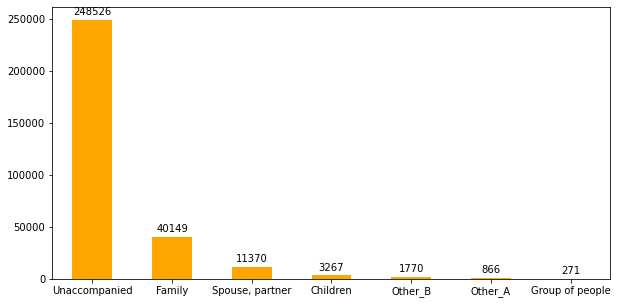

In [178]:
## Code taken from https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
plt.figure(figsize = (10, 5))
plots = df_train['NAME_TYPE_SUITE'].value_counts().plot(kind = 'bar', color = 'orange')
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.show()

Below we are going to be checking if there are NULL values present in our data. We see that there are quite a few null values present in our occupation type. Those values are printed below as can be seen. 

In [179]:
print("Are there any null values for the occupation type?\n")
if any(df_train['OCCUPATION_TYPE'].isnull()):
    print("Yes, there are null values for occupation type feature")
else:
    print("No, there are no null values for occupation type feature")


Are there any null values for the occupation type?

Yes, there are null values for occupation type feature


## Function to Calculate Null Percentage Values 
Now, it is time to calculate the NULL percentage values in our data. We are going to be predicting the NULL percentage values that are present in our data. We are going to be learning to be using those mechanisms that would ensure that we are going to be getting the best values for the test set. 

In [180]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

We are going to be predicting the percentage of NULL values based on different features respectively. 

In [181]:
null_percentage(df_train[['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']])

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
NAME_HOUSING_TYPE,0,0.000000


Now, it is time to use the function that we have created earlier and we are going to consider the different values that are present for features. 

In [182]:
null_percentage(df_train)[0: 30]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


## Missingno Library 
It is now time to use the missingno library that would plot the number of missing values when we consider those matrix values. The features would be marked on the y-axis. 

In [183]:
import missingno as msno

Below is a plot that is generated using missingno. We see that there are quite a few missing values for a lot of features. There are white dashes that represent missing NULL values. 

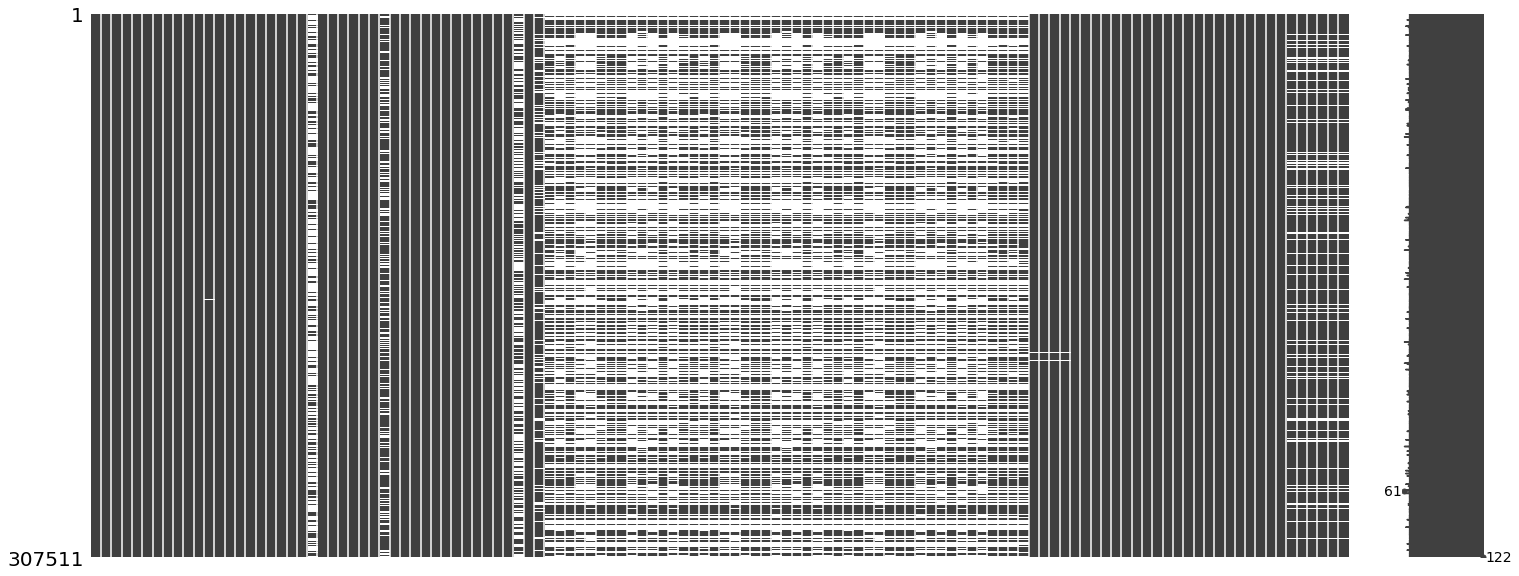

In [184]:
msno.matrix(df_train)
plt.show()

We select the amount goods price values below just to get an idea about the float values present. 

In [185]:
df_train.select_dtypes('float')['AMT_GOODS_PRICE']

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

Taking into account the bureau information along with various features that are important. 

In [186]:
len(df_train)

307511

In [187]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let us also read the test dataframe values just to make sure that we are working with the right data. 

In [188]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Let us now print the values of the train data and the test data respectively. We see that there are different values. 

In [189]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (48744, 121)


In [190]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
df_train.select_dtypes('float').shape

(307511, 65)

In [192]:
df_train.select_dtypes('float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,NaN,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [194]:
null_percentage(df_train).iloc[0: 5]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963


Now it is time to plot those NULL values present and calculate the top 50 NULL values respectively. 

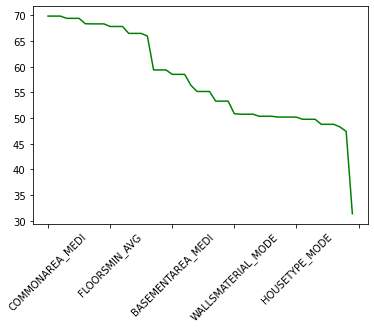

In [195]:
null_percentage(df_train).iloc[0: 50]['Percent'].plot(color = 'green')
plt.xticks(rotation = 45)
plt.show()

In [196]:
df_train.shape

(307511, 122)

Taking a look at different features, we are going to be converting those values and removing features that contain more than 50 percent of NULL values respectively. 

In [197]:
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)

In [198]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
df_train.shape

(307511, 81)

We have removed the percentage of NULL values that are above 50. Therefore, we are only considering features that contain values that are below 50 percent respectively. 

In [200]:
null_percentage(df_train).iloc[0: 30]

,Total,Percent
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307


We are going to take the had of the dataframe and take a look at the dataframe that contains the training values respectively. 

In [201]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


We are going to be predicting the top 20 negative features by using the function that we have created earlier. 

In [202]:
(df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False).iloc[0: 20]

FLOORSMAX_AVG                   0.497608
FLOORSMAX_MODE                  0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
NAME_TYPE_SUITE                 0.004201
DEF_30_CNT_SOCIAL_CIRCLE        0.003320
OBS_60_CNT_SOCIAL_CIRCLE        0.003320
DEF_60_CNT_SOCIAL_CIRCLE        0.003320
dtype: float64

We are going to take the top 20 values that are important for machine learning predictions. Taking a look at the different values, we are going to count the number of missing values from the below cell. 

In [203]:
count = 0
for i in range(len(df_train)):
    if df_train.iloc[i].isnull()[0] == True:
        count = count + 1

Taking a look at  different features, we are considering those values and taking predictions from the data. 

In [204]:
df_train.iloc[0].isnull()[0]

False

Let us see the percentage of rows that were dropped if we remove features with at least one NULL value. Below, we see that the percentage of values dropped are quite high. Therefore, we cannot remove all the features that contain NULL values. 

In [205]:
Number_of_rows_dropped = df_train.shape[0] - df_train.dropna().shape[0]
print("The total number of rows dropped is {}".format(Number_of_rows_dropped))
print("The percentage of rows dropped is {}%".format(np.round(Number_of_rows_dropped / len(df_train) * 100, 3)))

The total number of rows dropped is 222936
The percentage of rows dropped is 72.497%


In [206]:
df_train.shape

(307511, 81)

In [207]:
df_train.dropna().shape

(84575, 81)

In [208]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Again, we are going to print out the top percent of values that contain NULL values. We see that there are quite a lot of features that contain less that 50 percent of NULL values.

In [209]:
(df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False).iloc[0: 20]

FLOORSMAX_AVG                   0.497608
FLOORSMAX_MODE                  0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
NAME_TYPE_SUITE                 0.004201
DEF_30_CNT_SOCIAL_CIRCLE        0.003320
OBS_60_CNT_SOCIAL_CIRCLE        0.003320
DEF_60_CNT_SOCIAL_CIRCLE        0.003320
dtype: float64

In [210]:
df_train['FLOORSMAX_AVG']

0         0.0833
1         0.2917
2            NaN
3            NaN
4            NaN
           ...  
307506    0.6042
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_AVG, Length: 307511, dtype: float64

## Creating Mean, Median and Mode Functions

In the below cell, the functions that would return mean, median and mode for different features. By default, the inplace parameter would be False which means that the data values would not be replaced until it is set to True.

In [211]:
def mean_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    data.fillna(data.mean(), inplace = inplace)

def median_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    data.fillna(data.median(), inplace = inplace)

def mode_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    data.fillna(data.mode(), inplace = inplace)

It is time to use the mean imputation to replace the missing values with the mean values. We are going to be doing different types of imputations based on the requirements. Note that the 'inplace' parameter was set to False. However, we can also set the parameter to True in order to make permanent changes to our dataframe. 

In [212]:
mean_imputation(df_train['FLOORSMAX_AVG'])

In [213]:
df_train['FLOORSMAX_AVG']

0         0.0833
1         0.2917
2            NaN
3            NaN
4            NaN
           ...  
307506    0.6042
307507    0.0833
307508    0.1667
307509    0.0417
307510    0.3750
Name: FLOORSMAX_AVG, Length: 307511, dtype: float64

We would be performing similar operations on some of the other features in our dataframe. We see some features that are float values below. 

In [214]:
df_train[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON']]

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,1.0,0.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


Taking a look at some of the unique values for amt_req_credit_bureau_year feature. We would be taking a look at the values that are present below to get an understanding of the values. 

In [215]:
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

We are following the same approach for amt_req_credit_bureau_week and considering those values respectively. 

In [216]:
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

## Countplot of amt_req_credit_bureau_year
We are going to plot a graph between the amt_req_credit_bureau_year feature and calculate important values. We are just going to use the value_counts feature that would count those values and give us the predictions respectively. 

<AxesSubplot:>

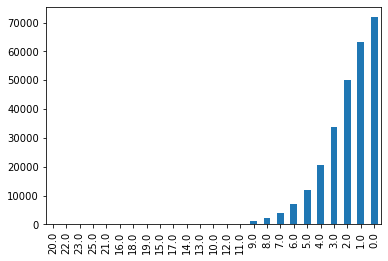

In [217]:
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().sort_values(ascending = True).plot(kind = 'bar')

## Countplot of amt_req_credit_bureau_hour

Now, let us also take the amt_req_credit_bureau_hour feature and plot the values. The plot could be seen below. 

<AxesSubplot:>

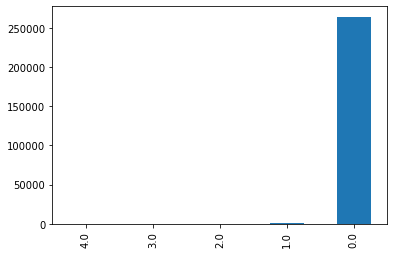

In [218]:
df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().sort_values(ascending = True).plot(kind = 'bar')

In [219]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Countplot of amt_req_credit_bureau_qrt

It is now time to get a plot of amt_req_credit_bureau_qrt and get an understanding of the data. 

<AxesSubplot:>

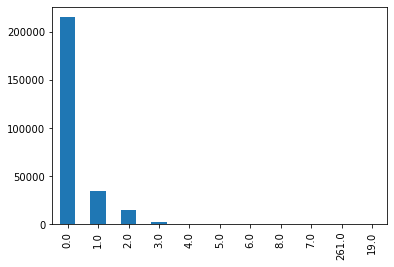

In [220]:
df_train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().plot(kind = 'bar')

In [221]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Countplot of NAME_CONTRACT_TYPE

Taking a look at countplot of the different types of loans, we see that most of the loans taken were cash loans. There were very few revolving loans added. 

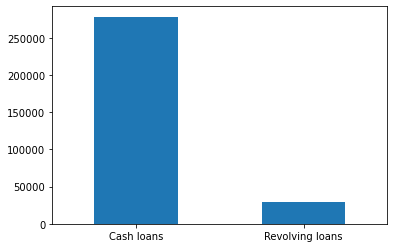

In [222]:
df_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

## Countplot of CODE_GENDER
Taking a look at the countplot of male and female candidates, we are going to count the values present respectively. We see that there are more number of females than males. 

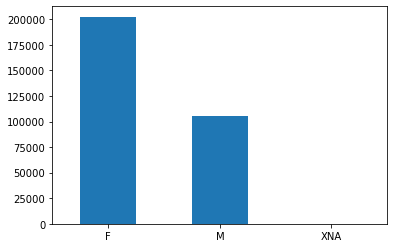

In [223]:
df_train['CODE_GENDER'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Taking a look at the 'XNA' gender and counting the values, we see that there are just 4 values. 

In [224]:
len(df_train[df_train['CODE_GENDER'] == 'XNA'])

4

Since there are very few values present that are of gender 'XNA', let us remove them when performing the machine learning operations. 

In [225]:
df_train = df_train[df_train['CODE_GENDER'] != 'XNA']

In [226]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
len(df_train)

307507

## Countplot of FLAG_OWN_REALTY

Taking a look at this feature, we are going to be getting only yes or no values. We see that there are many 'Yes' values compared to 'No' values respectively. 

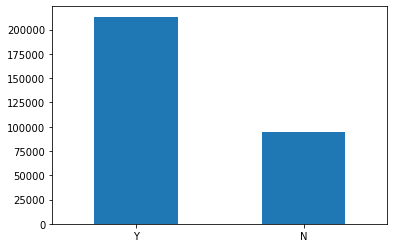

In [228]:
df_train['FLAG_OWN_REALTY'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

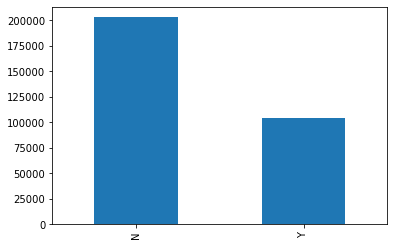

In [229]:
df_train['FLAG_OWN_CAR'].value_counts().plot(kind = 'bar')
plt.show()

## Kdeplot of AMT_INCOME_TOTAL

It is time to check the distribution of the total income amount. A large portion of the values are present in the beginning of the kdeplot and there are very few values that are really high values respectively. In addition to this, we see only a few values that are above 1 standard deviation from the mean. 

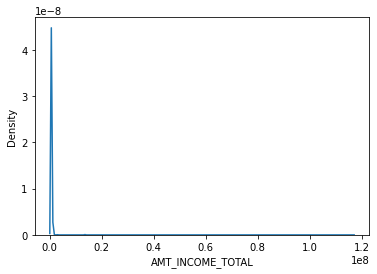

In [230]:
sns.kdeplot(df_train['AMT_INCOME_TOTAL'])
plt.show()

In [231]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Countplot of Target

Taking a look at the countplot, we get an understanding that most of the output points are of people who did not default on loan. There are very few people who have defaulted the loan. Therefore, we are dealing with an imbalanced dataset, and care must be taken when using various machine learning models for predictions. Sometimes, the KNN networks might not work well especially when the number of nearest neighbors taken is 1. If it is taken, the output that we are going to be get would be swayed towards the majority class. 

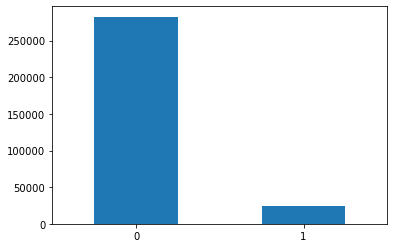

In [232]:
df_train['TARGET'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

## Kdeplot of AMT_INCOME_TOTAL 

Since the values that we took previously for plotting the averge income were quite high, let us restrict the values to just 800000 total income respectively. Below we see clearly that a large portion of customers have an income of about 1,00,000$ per annum respectively. There are some outliers in the data where the income is more than 6,00,000$ per annum. 

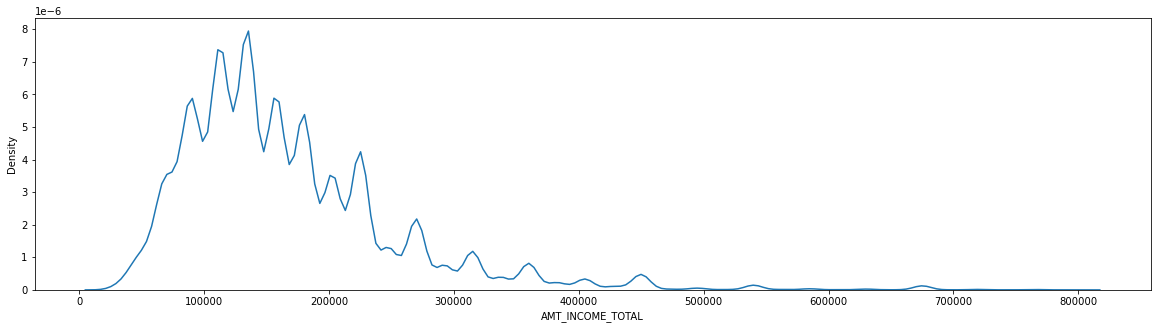

In [233]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df_train[df_train['AMT_INCOME_TOTAL'] < 800000]['AMT_INCOME_TOTAL'])
plt.show()

## Kdeplot of AMT_CREDIT

In a similar fashion, the kdeplot of AMT_CREDIT is plotted below. One could get an understanding that the loan borrowed is about 25,000$ where most of the values lie. There are a few people who take a loan about 2,00,000$ but those cases are exceptionally rare. 

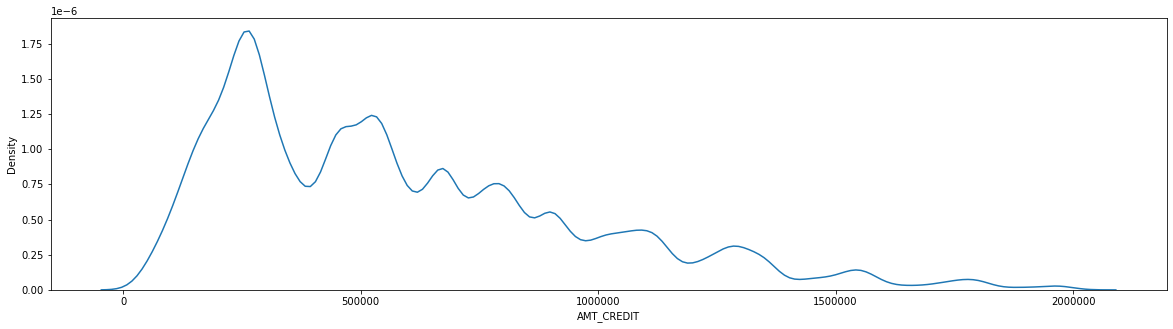

In [234]:
plt.figure(figsize = (20, 5))
sns.kdeplot(df_train[df_train['AMT_CREDIT'] < 2000000]['AMT_CREDIT'])
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

Taking a look at all the columns in our data and getting a good understanding of it. 

In [235]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

Let us now read the head of the dataframe and understand the different columns once again to get a good understanding of the data. 

In [236]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let us consider only the top 30 percent of values present in our data. We are going to be taking those values and we are getting an understanding of the missing values based on the function that we have created earlier. 

In [237]:
null_percentage(df_train).iloc[0: 30]['Percent']

FLOORSMAX_AVG                   49.761144
FLOORSMAX_MODE                  49.761144
FLOORSMAX_MEDI                  49.761144
YEARS_BEGINEXPLUATATION_AVG     48.781329
YEARS_BEGINEXPLUATATION_MODE    48.781329
YEARS_BEGINEXPLUATATION_MEDI    48.781329
TOTALAREA_MODE                  48.268820
EMERGENCYSTATE_MODE             47.398596
OCCUPATION_TYPE                 31.345303
EXT_SOURCE_3                    19.825565
AMT_REQ_CREDIT_BUREAU_YEAR      13.501806
AMT_REQ_CREDIT_BUREAU_HOUR      13.501806
AMT_REQ_CREDIT_BUREAU_DAY       13.501806
AMT_REQ_CREDIT_BUREAU_WEEK      13.501806
AMT_REQ_CREDIT_BUREAU_MON       13.501806
AMT_REQ_CREDIT_BUREAU_QRT       13.501806
NAME_TYPE_SUITE                  0.420153
DEF_30_CNT_SOCIAL_CIRCLE         0.332025
OBS_60_CNT_SOCIAL_CIRCLE         0.332025
DEF_60_CNT_SOCIAL_CIRCLE         0.332025
OBS_30_CNT_SOCIAL_CIRCLE         0.332025
EXT_SOURCE_2                     0.214629
AMT_GOODS_PRICE                  0.090404
AMT_ANNUITY                      0

Let us take a look at some of our columns that we are going to be working with in our data. 

In [238]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [239]:
null_percentage(df_train).iloc[0: 30]['Percent']

FLOORSMAX_AVG                   49.761144
FLOORSMAX_MODE                  49.761144
FLOORSMAX_MEDI                  49.761144
YEARS_BEGINEXPLUATATION_AVG     48.781329
YEARS_BEGINEXPLUATATION_MODE    48.781329
YEARS_BEGINEXPLUATATION_MEDI    48.781329
TOTALAREA_MODE                  48.268820
EMERGENCYSTATE_MODE             47.398596
OCCUPATION_TYPE                 31.345303
EXT_SOURCE_3                    19.825565
AMT_REQ_CREDIT_BUREAU_YEAR      13.501806
AMT_REQ_CREDIT_BUREAU_HOUR      13.501806
AMT_REQ_CREDIT_BUREAU_DAY       13.501806
AMT_REQ_CREDIT_BUREAU_WEEK      13.501806
AMT_REQ_CREDIT_BUREAU_MON       13.501806
AMT_REQ_CREDIT_BUREAU_QRT       13.501806
NAME_TYPE_SUITE                  0.420153
DEF_30_CNT_SOCIAL_CIRCLE         0.332025
OBS_60_CNT_SOCIAL_CIRCLE         0.332025
DEF_60_CNT_SOCIAL_CIRCLE         0.332025
OBS_30_CNT_SOCIAL_CIRCLE         0.332025
EXT_SOURCE_2                     0.214629
AMT_GOODS_PRICE                  0.090404
AMT_ANNUITY                      0

In [240]:
df_train['YEARS_BEGINEXPLUATATION_AVG']

0         0.9722
1         0.9851
2            NaN
3            NaN
4            NaN
           ...  
307506    0.9876
307507    0.9727
307508    0.9816
307509    0.9771
307510    0.9881
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 307507, dtype: float64

## Mean Imputation 

There are some features in our dataset that require mean imputation. We are going to only consider those values that require mean imputation. However, there are other values that require median or mode imputation depending on the feature. 

In [241]:
mean_imputation(df_train['FLOORSMAX_AVG'], inplace = True)
mean_imputation(df_train['FLOORSMAX_MEDI'], inplace = True)
mean_imputation(df_train['FLOORSMAX_MODE'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_AVG'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MEDI'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MODE'], inplace = True)


In [242]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have imputed the mean values of some of NULL values, we are going to create a function that would take into account the NULL values and impute the mean value of the entire row respectively. We've created that function below. 

In [243]:
count = 0
def null_columns(dataframe):
    count = 0
    null_features = []
    for i in range(len(dataframe.columns)):
        if any(df_train[dataframe.columns[i]].isnull()):
            count = count + 1
            null_features.append(dataframe.columns[i])
    return null_features, count

In [244]:
null_columns, total_null_features = null_columns(df_train)

Taking into account the missingno matrix that would consider the NULL values and give us a pictorial representation of them. Taking a look at the plot below, we can come to a conclusion that there are still many missing values that we must be dealing with before giving them to the machine learning models for predictions. 

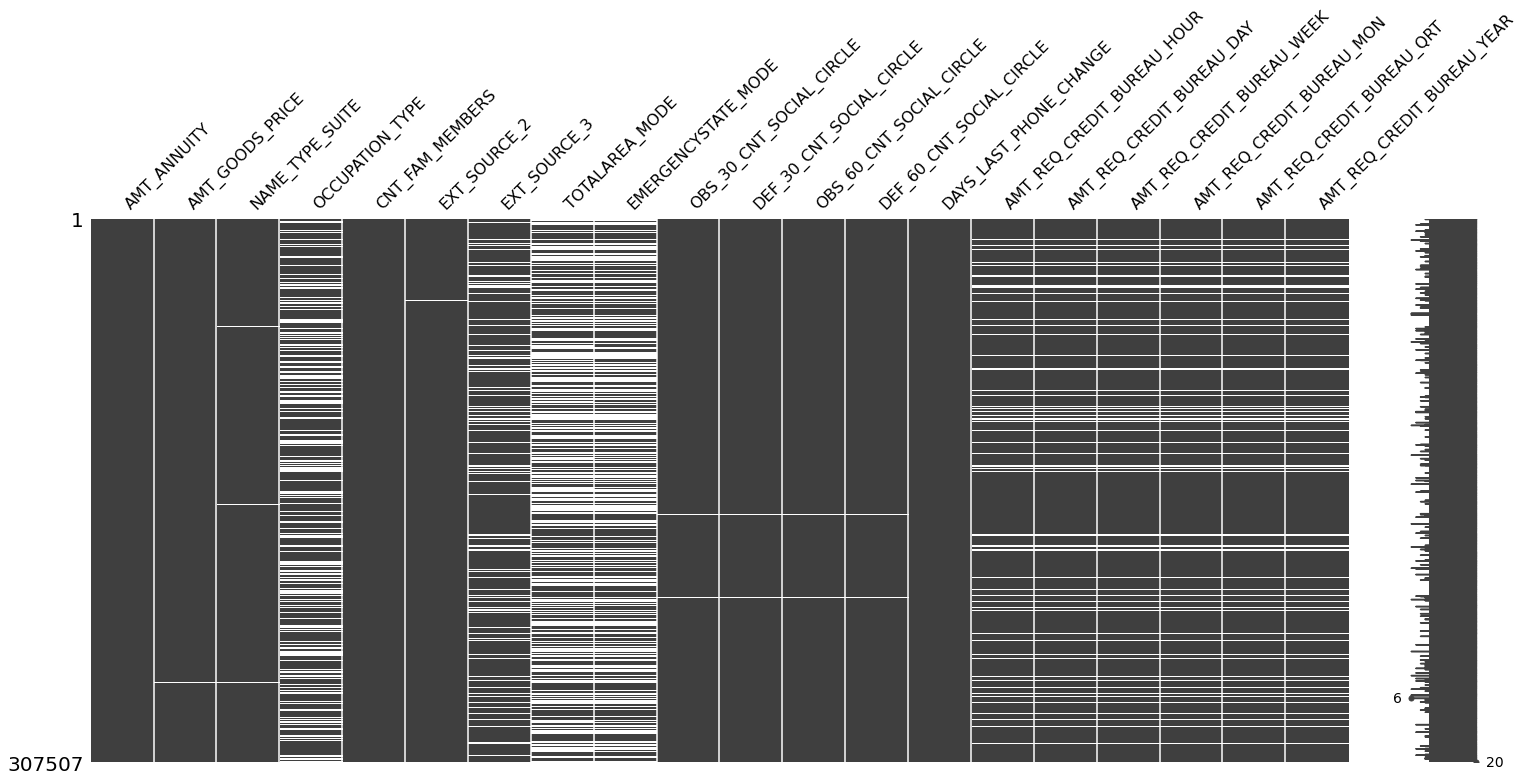

In [245]:
msno.matrix(df_train[null_columns])
plt.show()

In [246]:
null_percent_values = null_percentage(df_train)['Percent']
features_with_low_null_values = []
for i in range(len(df_train.columns)):
    if null_percent_values.iloc[i] < 10.0:
        features_with_low_null_values.append(null_percent_values.index[i])
        
    

In [247]:
features_with_low_null_values

['NAME_TYPE_SUITE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_2',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_11',
 'REGION_POPULATION_RELATIVE',
 'NAME_INCOME_TYPE',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'CNT_CHILDREN',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'FLAG_DOCUMENT_13',
 'NAME_EDUCATION_TYPE',
 'DAYS_BIRTH',
 'HOUR_APPR_PROCESS_START',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WOR

In [248]:
df_train[features_with_low_null_values].head()

,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,Business Entity Type 3,1,Single / not married,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,School,0,Married,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,Government,0,Single / not married,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,Business Entity Type 3,0,Civil marriage,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,1,Religion,0,Single / not married,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [249]:
df_train[features_with_low_null_values].shape

(307507, 71)

In [250]:
null_percentage(df_train[features_with_low_null_values])

,Total,Percent
NAME_TYPE_SUITE,1292,0.420153
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332025
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332025
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332025
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332025
...,...,...
CNT_CHILDREN,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CODE_GENDER,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000


In [251]:
df_train[features_with_low_null_values]['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [252]:
df_train[features_with_low_null_values].head()

,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,NAME_FAMILY_STATUS,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,Business Entity Type 3,1,Single / not married,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,School,0,Married,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,0,Government,0,Single / not married,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,Business Entity Type 3,0,Civil marriage,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,1,Religion,0,Single / not married,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [253]:
df_train_converted = df_train[features_with_low_null_values]

In the cell below, we've considered only the categorical values from features. We would be taking those values and applying the mode imputation which would ensure that we are getting the best results on our test set respectively. We would have to impute those values with the mode so that we get good results and reduce the NULL values. 

In [254]:
## This is done to get the categorical features. We can then perform mode imputation to get the values respectively.
## The suggestion was implemented from the website https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
total_columns =df_train_converted.columns 
numeric_data = df_train_converted._get_numeric_data()
categorical_columns = list(set(total_columns) - set(numeric_data.columns))

In [255]:
df_train_converted[categorical_columns].head()

,NAME_INCOME_TYPE,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,NAME_TYPE_SUITE,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE
0,Working,N,M,Secondary / secondary special,House / apartment,WEDNESDAY,Single / not married,Business Entity Type 3,Unaccompanied,Y,Cash loans
1,State servant,N,F,Higher education,House / apartment,MONDAY,Married,School,Family,N,Cash loans
2,Working,Y,M,Secondary / secondary special,House / apartment,MONDAY,Single / not married,Government,Unaccompanied,Y,Revolving loans
3,Working,N,F,Secondary / secondary special,House / apartment,WEDNESDAY,Civil marriage,Business Entity Type 3,Unaccompanied,Y,Cash loans
4,Working,N,M,Secondary / secondary special,House / apartment,THURSDAY,Single / not married,Religion,Unaccompanied,Y,Cash loans


Now, we see that lot of features that had a lot of NULL values are now imputed with mean and mode respectively. There are a few features that contain NULL values. We have to take a look at those features and fill those values so that we get the best results on the test set. 

<AxesSubplot:>

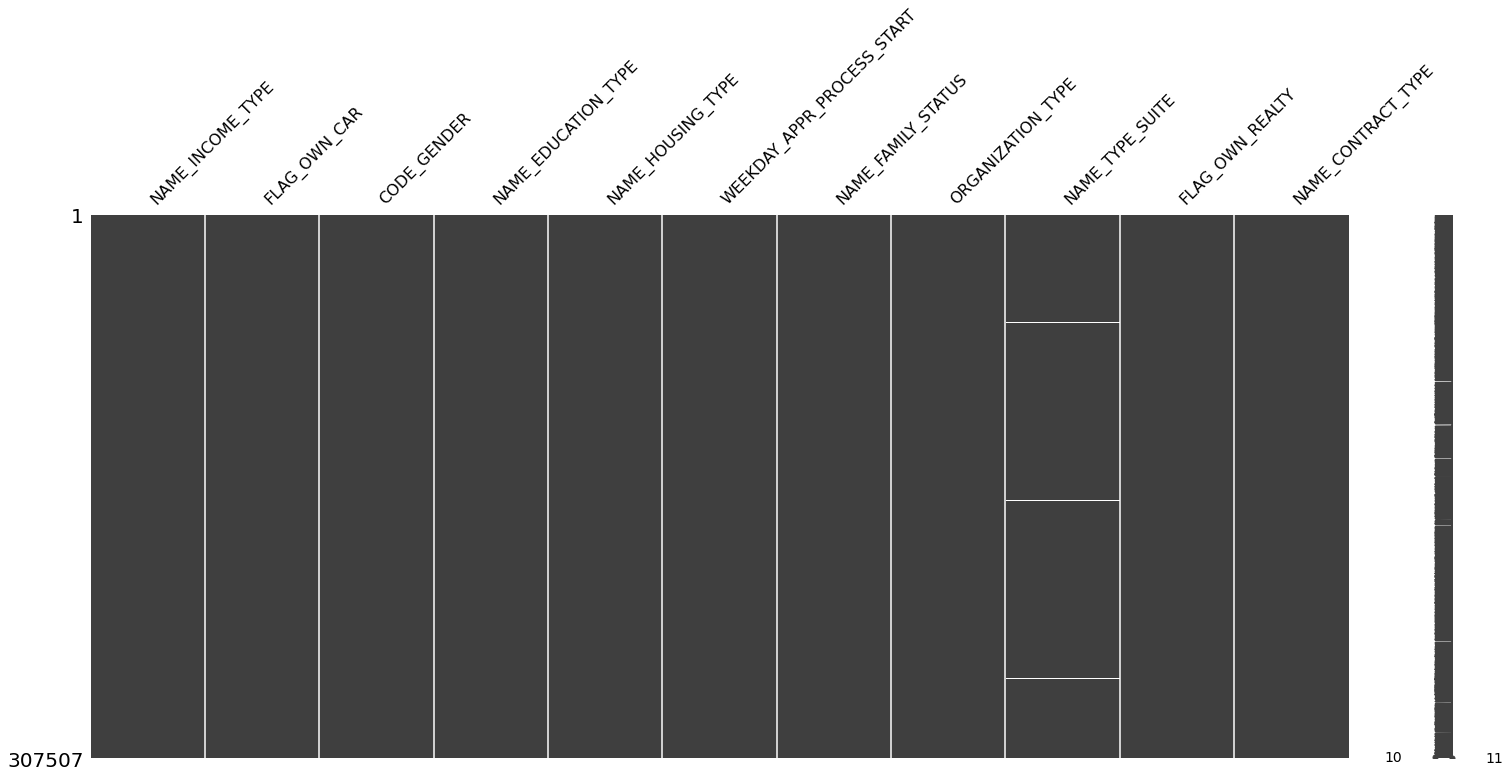

In [256]:
msno.matrix(df_train_converted[categorical_columns])

Since we have generated the categorical variables, it is now time to make a good analysis of them and understand their distribution and presence. We would now replace the remaining NULL values and add the mode values so that we get the best results. 

In [257]:
categorical_data = df_train_converted[categorical_columns]

We are now going to perform the mode imputation for the features that still contain missing values. We would be doing that based on the object types. 

In [258]:
mode_imputation(categorical_data, inplace = True)

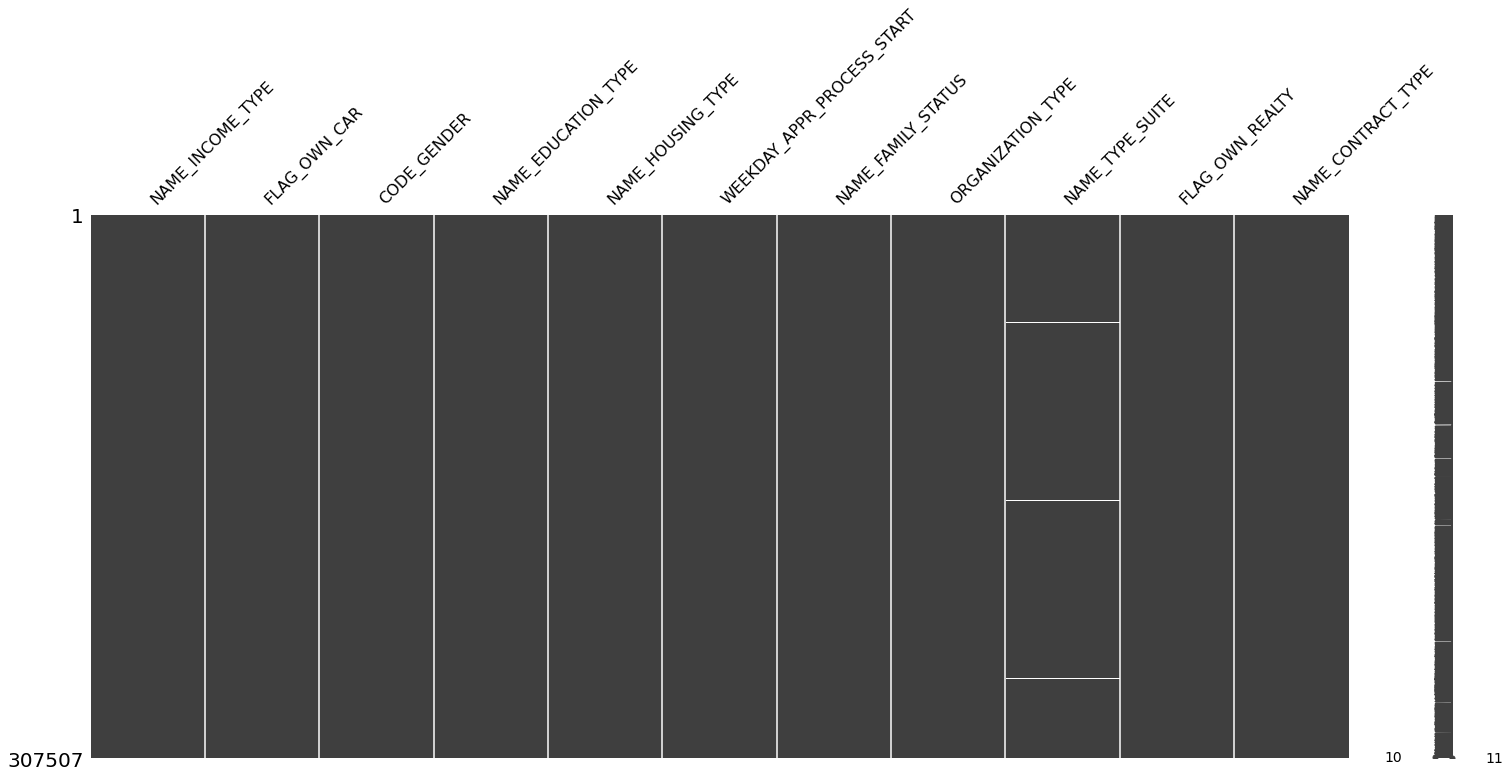

In [259]:
msno.matrix(categorical_data)
plt.show()

Let us now consider the numeric columns and exclude the categorical ones so that we get a good idea of their distribution. 

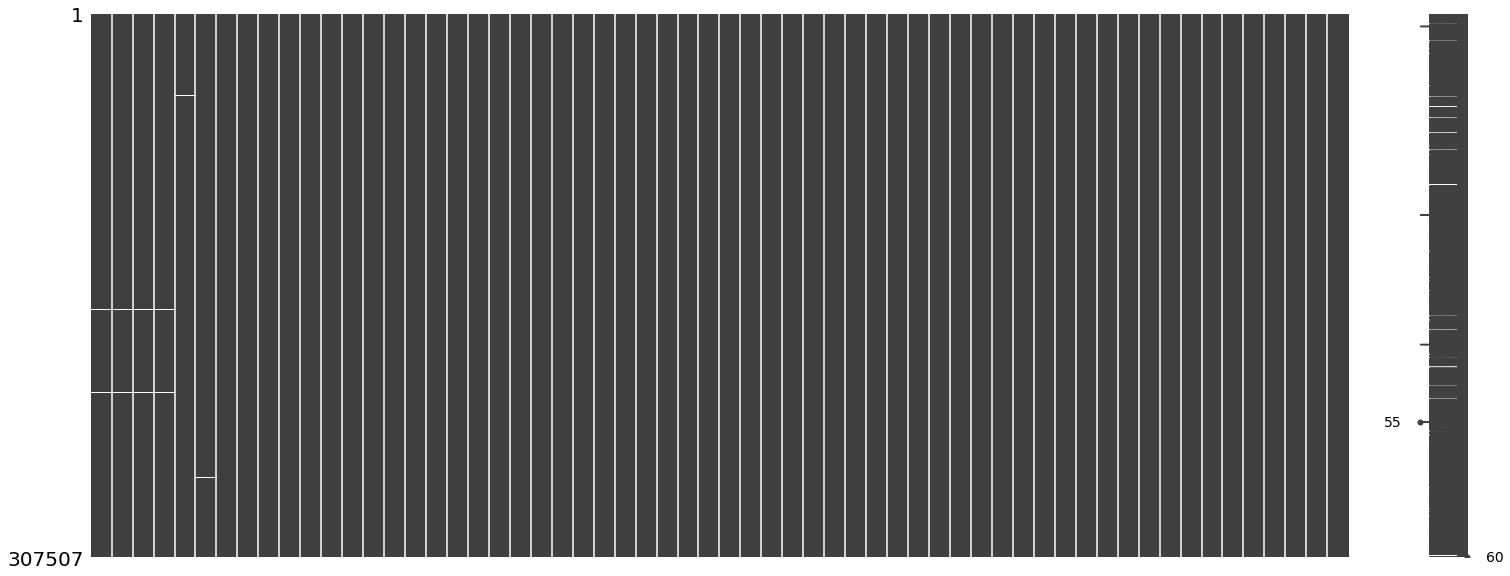

In [260]:
msno.matrix(numeric_data)
plt.show()

In [261]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [262]:
categorical_data.head()

,NAME_INCOME_TYPE,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,NAME_TYPE_SUITE,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE
0,Working,N,M,Secondary / secondary special,House / apartment,WEDNESDAY,Single / not married,Business Entity Type 3,Unaccompanied,Y,Cash loans
1,State servant,N,F,Higher education,House / apartment,MONDAY,Married,School,Family,N,Cash loans
2,Working,Y,M,Secondary / secondary special,House / apartment,MONDAY,Single / not married,Government,Unaccompanied,Y,Revolving loans
3,Working,N,F,Secondary / secondary special,House / apartment,WEDNESDAY,Civil marriage,Business Entity Type 3,Unaccompanied,Y,Cash loans
4,Working,N,M,Secondary / secondary special,House / apartment,THURSDAY,Single / not married,Religion,Unaccompanied,Y,Cash loans


In [263]:
print(mode_imputation.__doc__)


    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    


In [264]:
categorical_data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [265]:
categorical_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [266]:
categorical_data['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

In [267]:
categorical_data['NAME_TYPE_SUITE'].describe()

count            307507
unique                7
top       Unaccompanied
freq             249815
Name: NAME_TYPE_SUITE, dtype: object

In [268]:
any(categorical_data['NAME_TYPE_SUITE'].isnull())

False

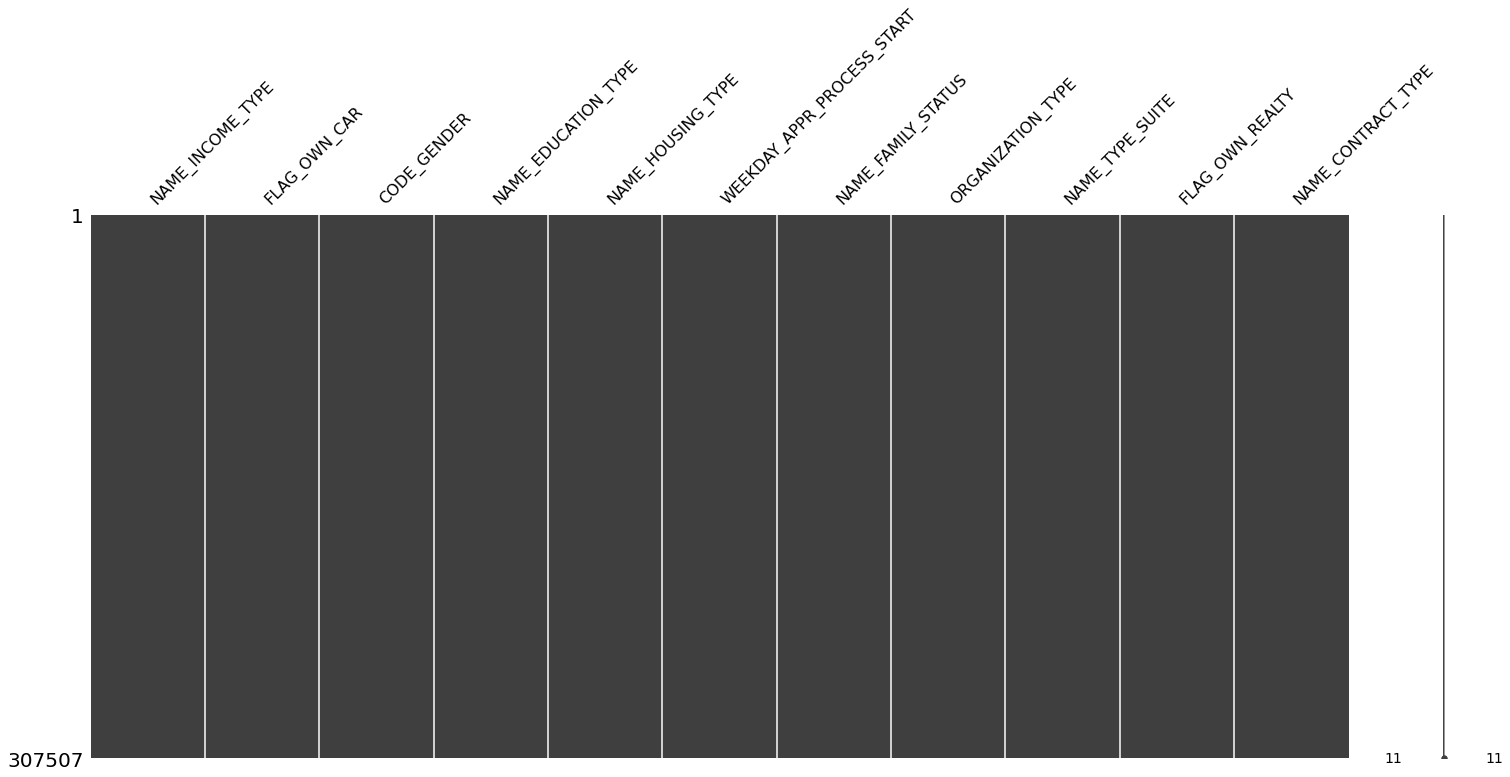

In [269]:
msno.matrix(categorical_data)
plt.show()

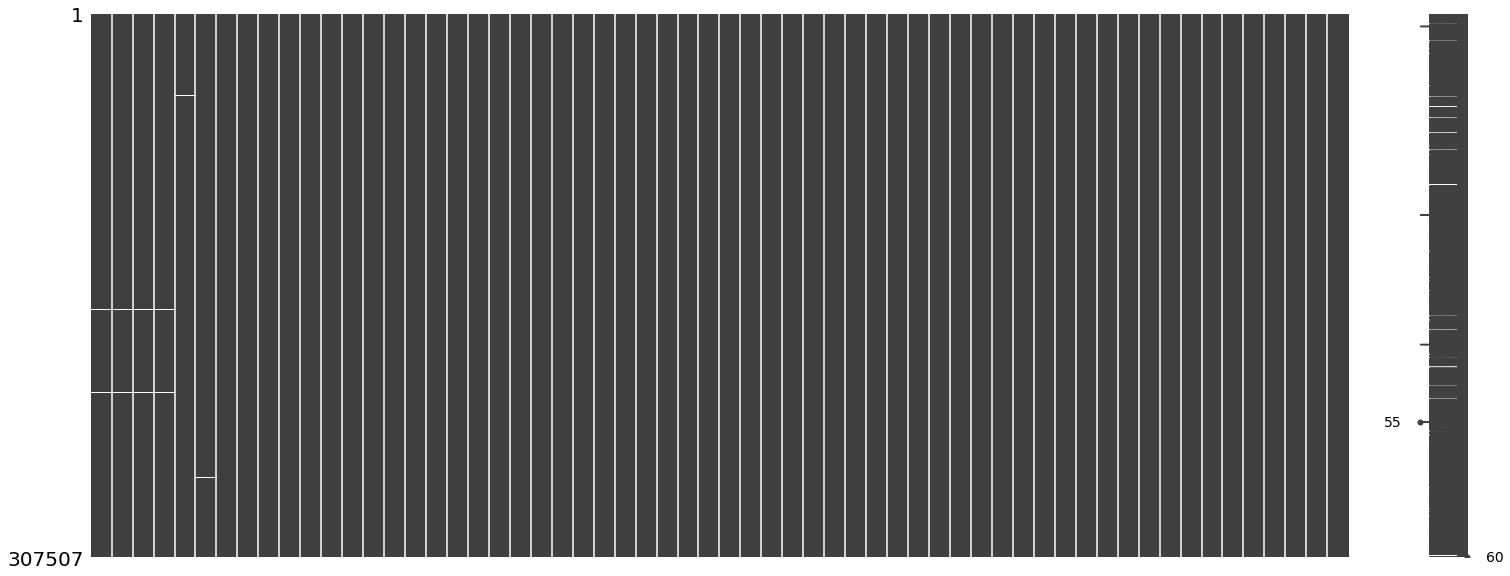

In [270]:
msno.matrix(numeric_data)
plt.show()

In [271]:
mean_imputation(numeric_data, inplace = True)

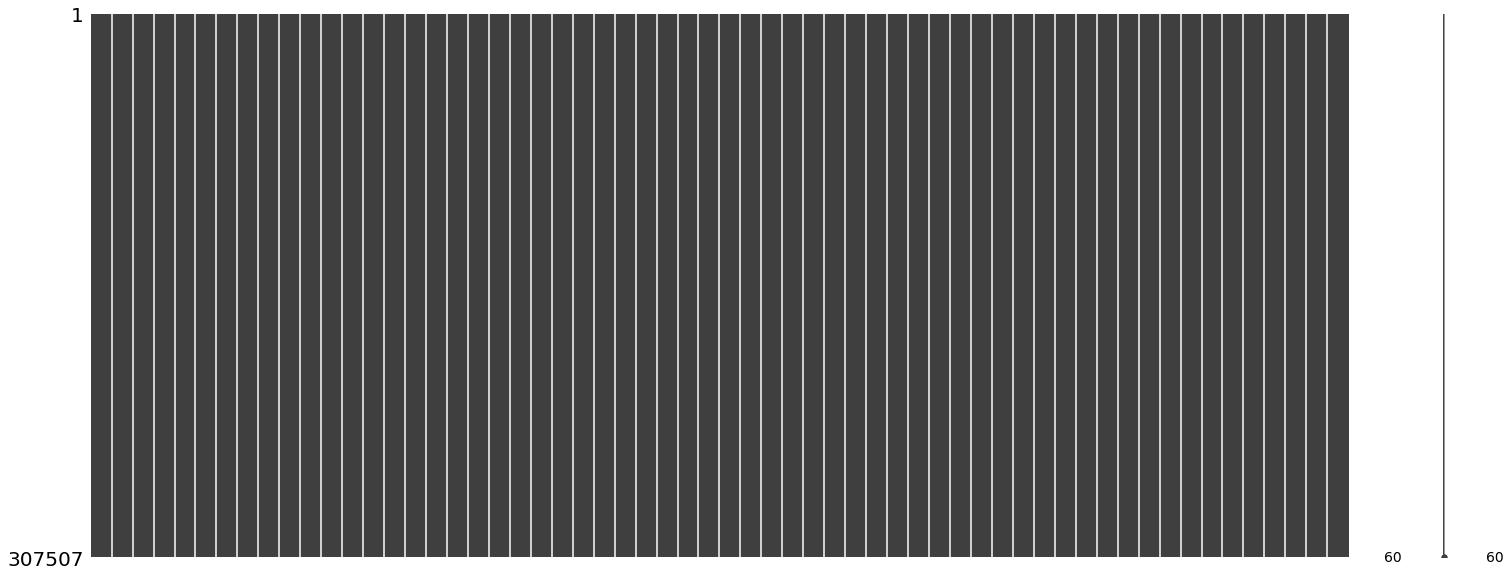

In [272]:
msno.matrix(numeric_data)
plt.show()

In [273]:
any(numeric_data.isnull())

True

In [274]:
categorical_data.head()

,NAME_INCOME_TYPE,FLAG_OWN_CAR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,NAME_TYPE_SUITE,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE
0,Working,N,M,Secondary / secondary special,House / apartment,WEDNESDAY,Single / not married,Business Entity Type 3,Unaccompanied,Y,Cash loans
1,State servant,N,F,Higher education,House / apartment,MONDAY,Married,School,Family,N,Cash loans
2,Working,Y,M,Secondary / secondary special,House / apartment,MONDAY,Single / not married,Government,Unaccompanied,Y,Revolving loans
3,Working,N,F,Secondary / secondary special,House / apartment,WEDNESDAY,Civil marriage,Business Entity Type 3,Unaccompanied,Y,Cash loans
4,Working,N,M,Secondary / secondary special,House / apartment,THURSDAY,Single / not married,Religion,Unaccompanied,Y,Cash loans


In [275]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [276]:
numeric_data.columns

Index(['DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'FLAG_DOCUMENT_11', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'CNT_CHILDREN', 'FLAG_DOCUMENT_13', 'DAYS_BIRTH',
       'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
  

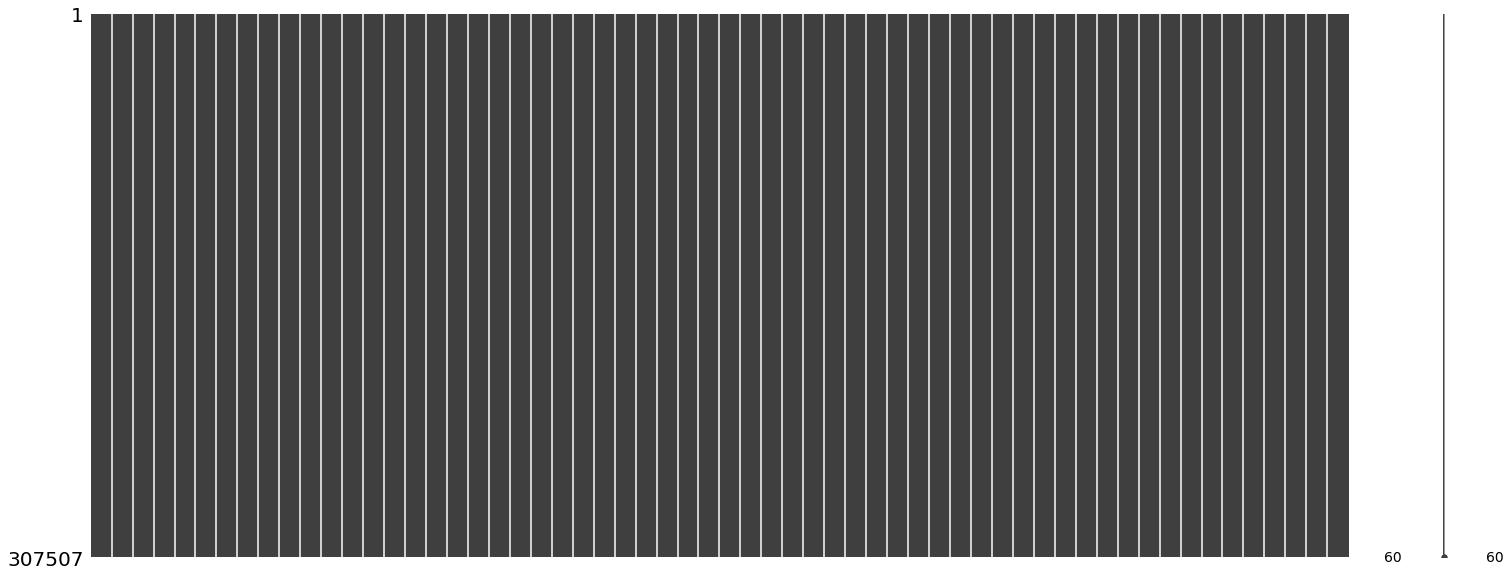

In [277]:
msno.matrix(numeric_data)
plt.show()

In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [279]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [280]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [424]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [426]:
def sampler_function(data_x, data_y, sampler = 0, random_state = 101):
    
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    else:
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', Counter(data_y))
    print('Resample dataset shape:', Counter(y_transformed))
    
    return X_transformed, y_transformed

In [282]:
numeric_data_with_target_dropped = numeric_data.drop('TARGET', axis = 1)

In [571]:
X = numeric_data_with_target_dropped
y = df_train['TARGET'].values

In [572]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [573]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_cv_standardized = scaler.transform(X_cv)



In [574]:
X_train, y_train = sampler_function(X_train_standardized, y_train, sampler = 2)

Original dataset shape: Counter({0: 197932, 1: 17322})
Resample dataset shape: Counter({0: 197932, 1: 197932})


In [575]:
X_cv, y_cv = sampler_function(X_cv_standardized, y_cv, sampler = 2)

Original dataset shape: Counter({0: 84750, 1: 7503})
Resample dataset shape: Counter({0: 84750, 1: 84750})


In [576]:
from sklearn.linear_model import LogisticRegression

In [577]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [578]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [579]:
from sklearn.metrics import accuracy_score

In [580]:
mean_absolute_error(y_predictions, y_cv)

0.345882005899705

In [581]:
accuracy_score(y_predictions, y_cv)

0.654117994100295

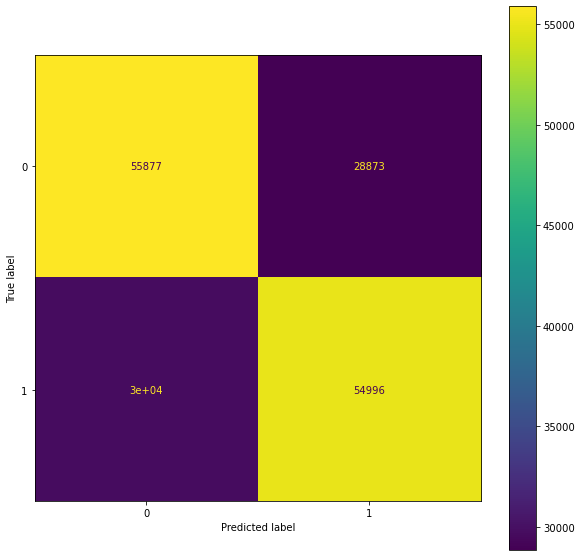

In [582]:
# https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa
# Credits to this blog for helping me in changing the size of the plot_confusion_matrix function from sklearn.metrics 
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.7095354916855927


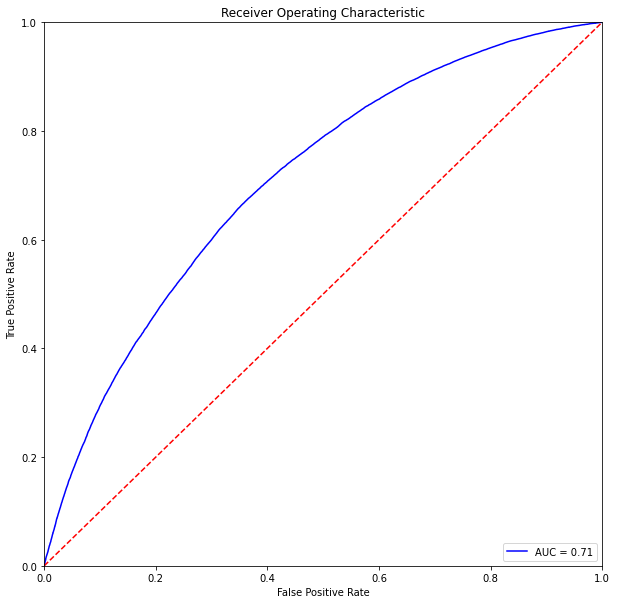

In [583]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code.

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes Classifier

In [584]:
from sklearn.naive_bayes import GaussianNB

In [585]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

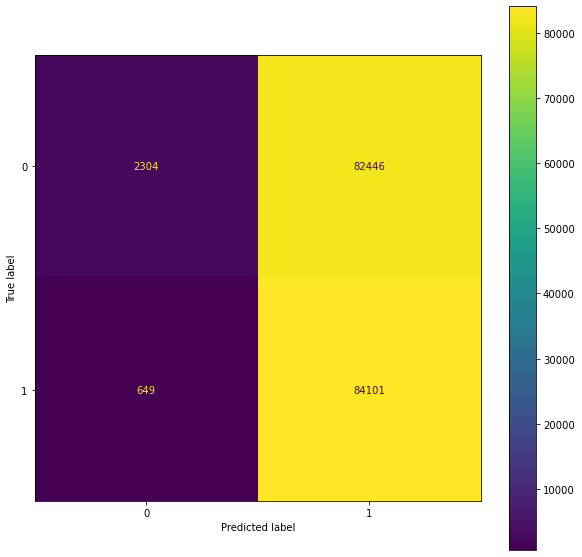

In [586]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.66811278077984


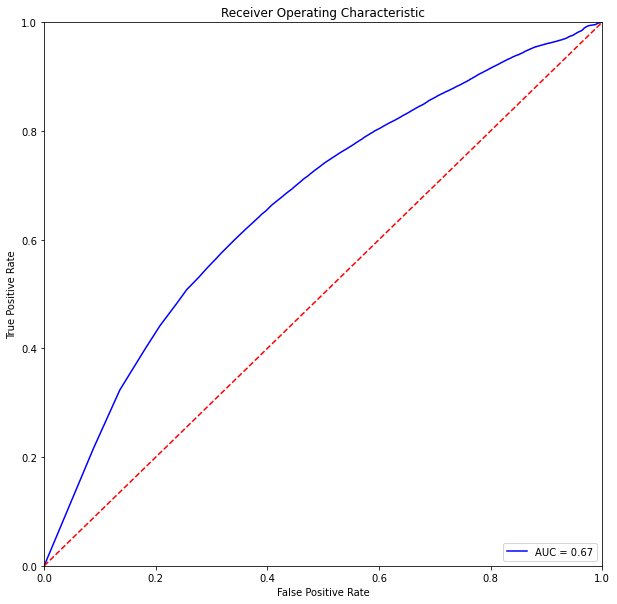

In [587]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code.

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [588]:
from sklearn.tree import DecisionTreeClassifier

In [589]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

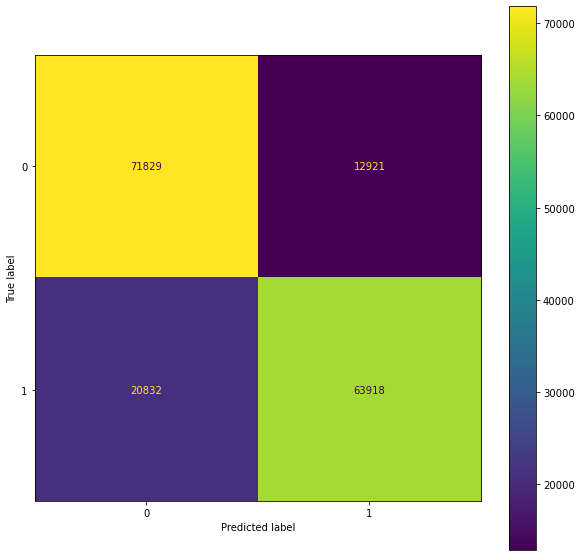

In [590]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
plt.show()

In [591]:
from sklearn.metrics import classification_report

In [592]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81     92661
           1       0.75      0.83      0.79     76839

    accuracy                           0.80    169500
   macro avg       0.80      0.80      0.80    169500
weighted avg       0.81      0.80      0.80    169500



In [593]:
from sklearn.ensemble import RandomForestClassifier

AUC for our classifier is: 0.8008672566371681


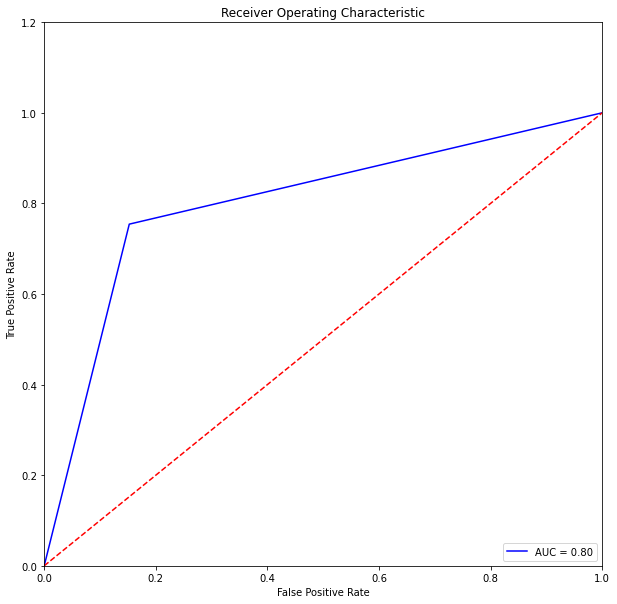

In [594]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code.

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [595]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [596]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88    105021
           1       0.74      0.98      0.85     64479

    accuracy                           0.86    169500
   macro avg       0.86      0.89      0.86    169500
weighted avg       0.89      0.86      0.87    169500



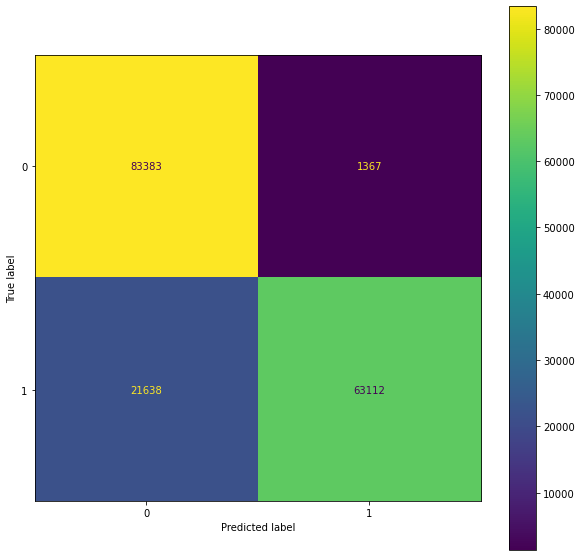

In [597]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.9477368957805796


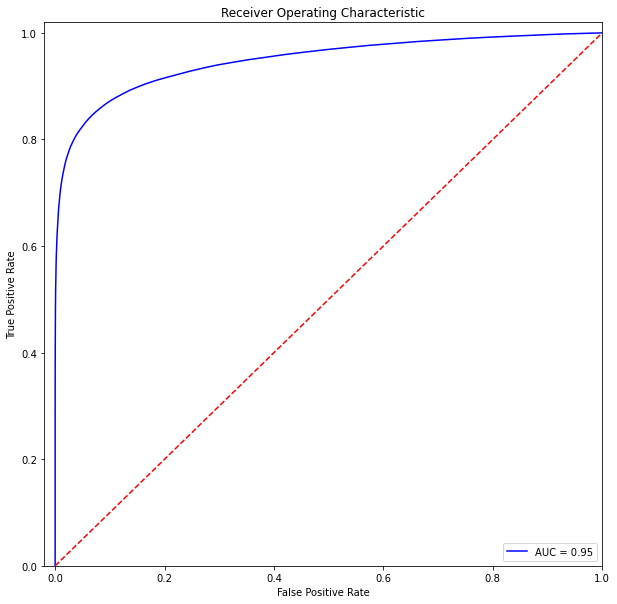

In [598]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code.

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [599]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

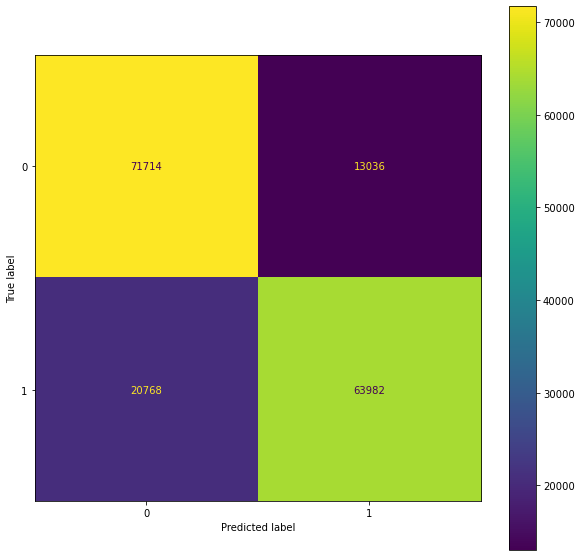

In [600]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
plt.show()

In [601]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81     92482
           1       0.75      0.83      0.79     77018

    accuracy                           0.80    169500
   macro avg       0.80      0.80      0.80    169500
weighted avg       0.80      0.80      0.80    169500



AUC for our classifier is: 0.800566371681416


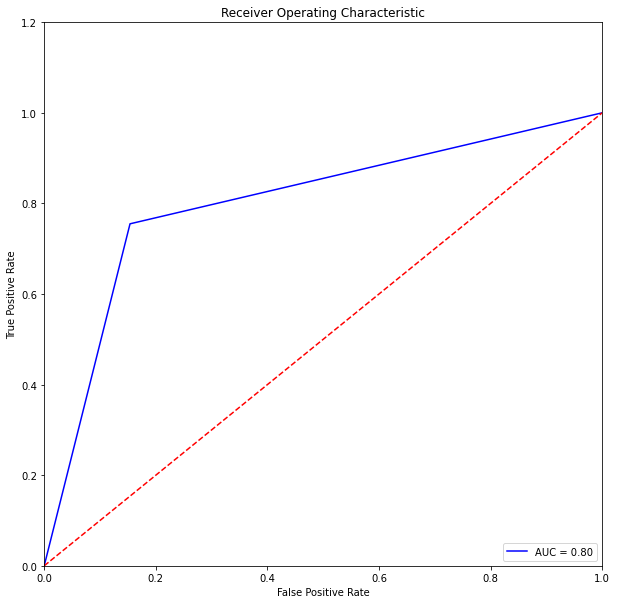

In [602]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code.

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [603]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

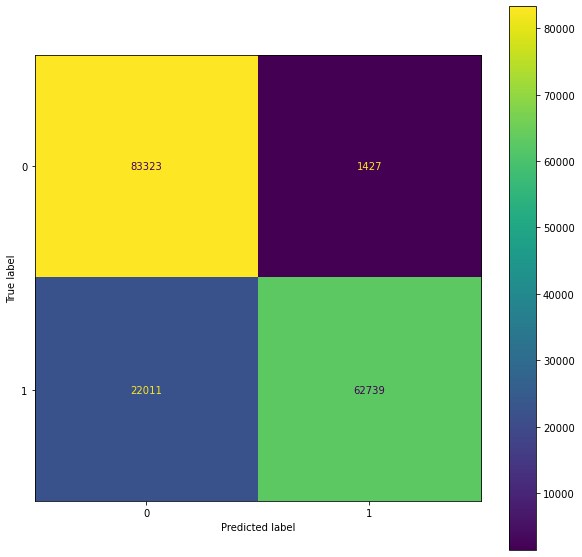

In [604]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax)
plt.show()

AUC for our classifier is: 0.9472170865203052


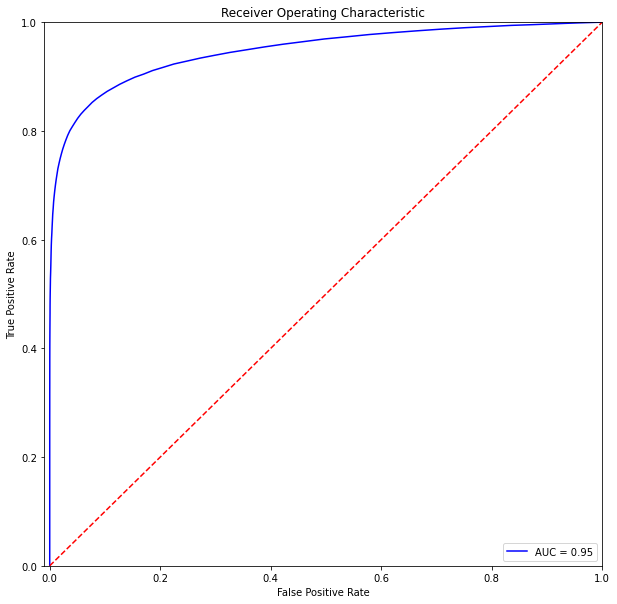

In [605]:
## https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
## Credits to this website for providing such an useful and clear explanation of the topic along with the code.

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()